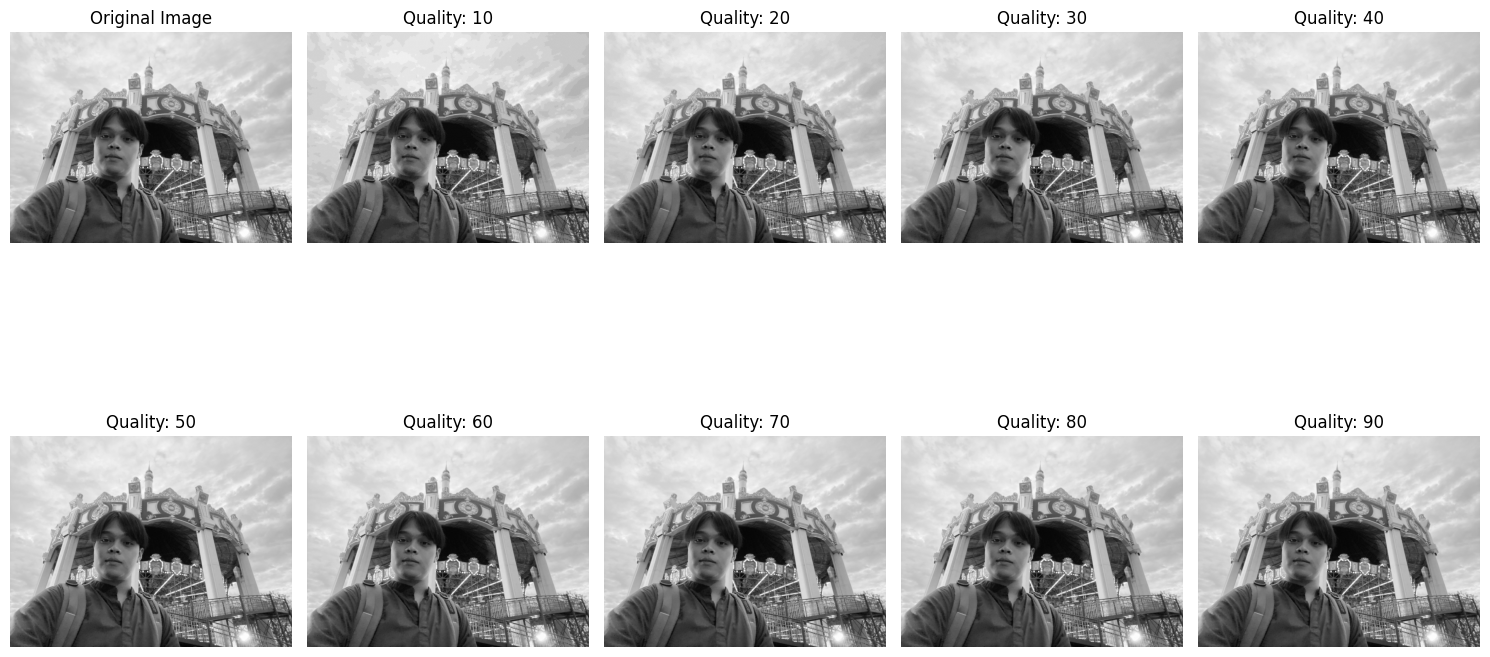

In [8]:
import numpy as np
from scipy.fft import dct, idct
from PIL import Image  # สำหรับอ่านและเขียนไฟล์ภาพ (ต้องติดตั้ง Pillow: pip install Pillow)
import matplotlib.pyplot as plt
import os

# 1. ฟังก์ชันสำหรับทำ JPEG Compression/Decompression
def jpeg_compress_decompress(image_block, quality):
    """
    ทำการบีบอัดและคลายการบีบอัดแบบ JPEG (DCT, Quantization, IDCT)
    พร้อมปรับ Quality

    Args:
        image_block (numpy.ndarray): บล็อกรูปภาพ 8x8 พิกเซล
        quality (int): ระดับ Quality (1-100)

    Returns:
        numpy.ndarray: บล็อกรูปภาพที่ถูกคลายการบีบอัด
    """
    # 1. DCT
    dct_transformed = dct(dct(image_block, axis=0, norm='ortho'), axis=1, norm='ortho')

    # 2. Quantization
    q_matrix = np.array([
        [16, 11, 10, 16, 24, 40, 51, 61],
        [12, 12, 14, 19, 26, 58, 60, 55],
        [14, 13, 16, 24, 40, 57, 69, 56],
        [14, 17, 22, 29, 51, 87, 80, 62],
        [18, 22, 37, 56, 68, 109, 103, 77],
        [24, 35, 55, 64, 81, 104, 113, 92],
        [49, 64, 78, 87, 103, 121, 120, 101],
        [72, 92, 95, 98, 112, 100, 103, 99]
    ])

    # ปรับตาราง Quantization ตาม Quality
    if quality < 50:
        scale = 50 / quality
    else:
        scale = (100 - quality) / 50
    quantized = np.round(dct_transformed / (q_matrix * scale))

    # 3. Dequantization
    dequantized = quantized * (q_matrix * scale)

    # 4. IDCT
    idct_transformed = idct(idct(dequantized, axis=0, norm='ortho'), axis=1, norm='ortho')

    return idct_transformed

# 2. โหลดภาพ (คุณต้องมีไฟล์ภาพ 'peppers.png' ในไดเรกทอรีเดียวกัน)
try:
    original_image = Image.open('image/IMG_7094.jpg').convert('L')  # โหลดเป็นภาพขาวดำ
except FileNotFoundError:
    print("Error: File 'peppers.png' not found. Please make sure the file exists.")
    exit()

# 3. กำหนด Quality Levels ที่จะแสดง
quality_levels = [10, 20, 30, 40, 50, 60, 70, 80, 90]

# 4. สร้าง Subplots สำหรับแสดงภาพ
num_plots = len(quality_levels) + 1  # จำนวน plots (รวมภาพต้นฉบับ)
fig, axes = plt.subplots(2, num_plots // 2 + num_plots % 2, figsize=(15, 10))
axes = axes.flatten()  # ทำให้ axes เป็น 1D array

# 5. แสดงภาพต้นฉบับ
axes[0].imshow(original_image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# 6. ทำการบีบอัดและคลายการบีบอัดสำหรับแต่ละ Quality
image_array = np.array(original_image)
height, width = image_array.shape
reconstructed_images = [] # เก็บภาพ reconstructed

for quality in quality_levels:
    reconstructed_image = np.zeros_like(image_array, dtype=float)
    for y in range(0, height, 8):
        for x in range(0, width, 8):
            block = image_array[y:y+8, x:x+8]
            if block.shape == (8, 8):
                reconstructed_block = jpeg_compress_decompress(block, quality)
                reconstructed_image[y:y+8, x:x+8] = reconstructed_block

    reconstructed_image = np.clip(reconstructed_image, 0, 255).astype(np.uint8)
    reconstructed_images.append(reconstructed_image)

# 7. แสดงภาพที่ถูกบีบอัดและคลายการบีบอัด
for i, (quality, reconstructed_image) in enumerate(zip(quality_levels, reconstructed_images)):
    axes[i + 1].imshow(reconstructed_image, cmap='gray')
    axes[i + 1].set_title(f'Quality: {quality}')
    axes[i + 1].axis('off')

# 8. ปรับ layout และแสดงผล
plt.tight_layout()
plt.show()

In [14]:
import numpy as np
from scipy.fft import dct, idct
from PIL import Image  # สำหรับอ่านและเขียนไฟล์ภาพ (ต้องติดตั้ง Pillow)
import os

# 1. ฟังก์ชันสำหรับทำ JPEG Compression/Decompression
def jpeg_compress_decompress(image_block, quality):
    """
    ทำการบีบอัดและคลายการบีบอัดแบบ JPEG (DCT, Quantization, IDCT)
    พร้อมปรับ Quality

    Args:
        image_block (numpy.ndarray): บล็อกรูปภาพ 8x8 พิกเซล
        quality (int): ระดับ Quality (1-100)

    Returns:
        numpy.ndarray: บล็อกรูปภาพที่ถูกคลายการบีบอัด
    """
    # 1. DCT
    dct_transformed = dct(dct(image_block, axis=0, norm='ortho'), axis=1, norm='ortho')

    # 2. Quantization
    q_matrix = np.array([
        [16, 11, 10, 16, 24, 40, 51, 61],
        [12, 12, 14, 19, 26, 58, 60, 55],
        [14, 13, 16, 24, 40, 57, 69, 56],
        [14, 17, 22, 29, 51, 87, 80, 62],
        [18, 22, 37, 56, 68, 109, 103, 77],
        [24, 35, 55, 64, 81, 104, 113, 92],
        [49, 64, 78, 87, 103, 121, 120, 101],
        [72, 92, 95, 98, 112, 100, 103, 99]
    ])

    # ปรับตาราง Quantization ตาม Quality
    if quality < 50:
        scale = 50 / quality
    else:
        scale = (100 - quality) / 50
    quantized = np.round(dct_transformed / (q_matrix * scale))

    # 3. Dequantization
    dequantized = quantized * (q_matrix * scale)

    # 4. IDCT
    idct_transformed = idct(idct(dequantized, axis=0, norm='ortho'), axis=1, norm='ortho')

    return idct_transformed


# 2. โหลดภาพ
try:
    original_image = Image.open('image/IMG_7003.jpg').convert('L')
except FileNotFoundError:
    print("Error: File 'image' not found. Please make sure the file exists.")
    exit()

# 3. กำหนด Quality Levels
quality_levels = [10, 20, 30, 40, 50, 60, 70, 80, 90]

# 4. ทำการบีบอัดและคลายการบีบอัดสำหรับแต่ละ Quality และบันทึกเป็นไฟล์
image_array = np.array(original_image)
height, width = image_array.shape
print("The image heigh is " +str(height)+", and image width is "+str(width)+" pixels")

for quality in quality_levels:
    reconstructed_image = np.zeros_like(image_array, dtype=float)

    for y in range(0, height, 8):
        for x in range(0, width, 8):
            block = image_array[y:y+8, x:x+8]
            if block.shape == (8, 8):
                reconstructed_block = jpeg_compress_decompress(block, quality)
                reconstructed_image[y:y+8, x:x+8] = reconstructed_block

    reconstructed_image = np.clip(reconstructed_image, 0, 255).astype(np.uint8)
    reconstructed_image_pil = Image.fromarray(reconstructed_image)  # แปลง numpy array เป็น PIL Image

    # สร้างชื่อไฟล์สำหรับบันทึก
    output_filename = f"quality_{quality}.jpg"

    # บันทึกรูปภาพ
    reconstructed_image_pil.save(output_filename)
    print(f"Saved: {output_filename}")

The image heigh is 3088, and image width is 2316 pixels
Saved: quality_10.jpg
Saved: quality_20.jpg
Saved: quality_30.jpg
Saved: quality_40.jpg
Saved: quality_50.jpg
Saved: quality_60.jpg
Saved: quality_70.jpg
Saved: quality_80.jpg
Saved: quality_90.jpg
